<a href="https://colab.research.google.com/github/Rehan-Syed/Rehan-Syed/blob/main/RLBinception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
#from tensorflow.keras.metrics import Accuracy, FalsePositives, TruePositives, TrueNegatives, Precision, Recall
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [ ]:
size =[256,256]

In [ ]:
inception = InceptionV3(input_shape=size + [3], weights='imagenet', include_top=False,fine_tune=2)

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   #zca_whitening = True
                                   horizontal_flip = True
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255
                                  )

In [3]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Actual-Dataset/Test',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 510 images belonging to 2 classes.


In [4]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Actual-Dataset/Train',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1060 images belonging to 2 classes.


In [5]:
checkpoint=ModelCheckpoint('/content/drive/MyDrive/Actual-Dataset/INCEPTIONV#.h5',
                          monitor='val_accuracy',
                          mode='auto',
                          save_best_only=True,
                          verbose=1
                           )
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=100,
                       verbose=1,
                       restore_best_weights=True
                      )

callbacks=[checkpoint,earlystop]

In [ ]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  callbacks= callbacks,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 14.1018 - accuracy: 0.6922
Epoch 1: val_accuracy improved from -inf to 0.79412, saving model to /content/drive/MyDrive/Actual-Dataset/INCEPTIONV#.h5
16/16 [==============================] - 18s 861ms/step - loss: 14.1018 - accuracy: 0.6922 - val_loss: 9.3355 - val_accuracy: 0.7941
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 6.3198 - accuracy: 0.8157
Epoch 2: val_accuracy improved from 0.79412 to 0.87451, saving model to /content/drive/MyDrive/Actual-Dataset/INCEPTIONV#.h5
16/16 [==============================] - 11s 712ms/step - loss: 6.3198 - accuracy: 0.8157 - val_loss: 4.5020 - val_accuracy: 0.8745
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 4.1280 - accuracy: 0.8784
Epoch 3: val_accuracy did not improve from 0.87451
16/16 [==============================] - 11s 664ms/step - loss: 4.1280 - accuracy: 0.8784 - val_loss: 3.9989 - val_accuracy: 0.8745
Epoch 4/50
16/16 [====

In [6]:
#Loading Model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Actual-Dataset/INCEPTIONV#.h5')

In [ ]:
check_acc = model.evaluate_generator(training_set)[1]
print('The training accuracy is =', check_acc)

In [7]:
# predict probabilities for test set
Store = model.predict(test_set)
y_pred = np.argmax(Store, axis=1)

In [8]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

Evaluation

In [17]:
# predict probabilities for test set
yhat_probs = model.predict(test_set, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(test_set, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_set,yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_set,yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_set, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_set, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(test_set, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_set, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_set, yhat_classes)
print(matrix)

AttributeError: ignored

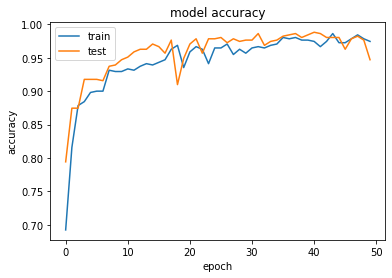

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plot to show
plt.show()

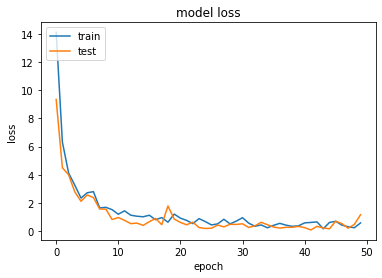

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history.history

In [ ]:
image_dir=r'/content/drive/MyDrive/RiceLeaf/validation/Healthy/IMG_20190419_094316.jpg'
def prediction(image_dir):
  img = image.load_img(image_dir, target_size=[256,256])
  im= image.img_to_array(img)
#i = preprocess_input[img]
#np_image_li = np.array([0])
#np_image_li.shape
  img = np.expand_dims(im, axis=0)
  pred =np.argmax(model.predict(img))
  print(f'This belongs to class indices =', pred)

In [ ]:
prediction(image_dir)

This belongs to class indices = 1


In [ ]:
training_set.class_indices

{'Healthy_Leaves': 0, 'LeafBlast_Disease': 1}